In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import FancyBboxPatch

# Your personal top tracks (Queens of the Stone Age)
personal_tracks = [
    "The Blood is Love",
    "Misfit Love", 
    "I Sat by the Ocean",
    "In My Head",
    "Go With the Flow",
    "Better Living Through Chemistry",
    "3's & 7's",
    "Long Slow Goodbye",
    "You Can't Quit Me Baby",
    "Make It Wit Chu",
    "Un-Reborn Again",
    "The Bronze",
    "Better Living Through Chemistry - Live 2018",
    "Sick, Sick, Sick",
    "Into the Hollow",
    "Mama Got the Blues",
    "Do It Again",
    "Villains of Circumstance",
    "Little Sister",
    "Fortress"
]

# Global top tracks (Queens of the Stone Age)
global_tracks = [
    "No One Knows",
    "Go With the Flow",
    "Little Sister",
    "Make It Wit Chu", 
    "First It Giveth",
    "3's & 7's",
    "I Sat by the Ocean",
    "The Lost Art of Keeping a Secret",
    "In My Head",
    "Feel Good Hit of the Summer",
    "Gonna Leave You",
    "Do It Again",
    "Song For The Dead",
    "Burn the Witch",
    "Another Love Song",
    "The Sky Is Fallin'",
    "Six Shooter",
    "Mosquito Song",
    "Medication",
    "My God Is the Sun"
]

print("Personal Top 20:")
for i, track in enumerate(personal_tracks, 1):
    print(f"{i:2d}. {track}")

print("\nGlobal Top 20:")
for i, track in enumerate(global_tracks, 1):
    print(f"{i:2d}. {track}")


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Find matching tracks and their positions
def find_matches(personal_list, global_list):
    matches = []
    for i, personal_track in enumerate(personal_list):
        for j, global_track in enumerate(global_list):
            if personal_track == global_track:
                matches.append({
                    'track': personal_track,
                    'personal_rank': i + 1,
                    'global_rank': j + 1,
                    'personal_pos': i,
                    'global_pos': j
                })
    return matches

# Get all unique tracks (for tracks that appear in only one list)
def get_all_tracks(personal_list, global_list):
    all_tracks = []
    
    # Add personal tracks
    for i, track in enumerate(personal_list):
        all_tracks.append({
            'track': track,
            'personal_rank': i + 1,
            'global_rank': None,
            'personal_pos': i,
            'global_pos': None,
            'in_both': track in global_list
        })
    
    # Add global tracks that aren't in personal list
    for j, track in enumerate(global_list):
        if track not in personal_list:
            all_tracks.append({
                'track': track,
                'personal_rank': None,
                'global_rank': j + 1,
                'personal_pos': None,
                'global_pos': j,
                'in_both': False
            })
    
    return all_tracks

matches = find_matches(personal_tracks, global_tracks)
all_tracks = get_all_tracks(personal_tracks, global_tracks)

print(f"Found {len(matches)} matching tracks:")
for match in matches:
    direction = ""
    if match['personal_rank'] < match['global_rank']:
        direction = "↑ (you rank it higher)"
    elif match['personal_rank'] > match['global_rank']:
        direction = "↓ (you rank it lower)"
    else:
        direction = "= (same ranking)"
    
    print(f"  {match['track']}: Personal #{match['personal_rank']}, Global #{match['global_rank']} {direction}")

print(f"\nPersonal-only tracks: {len([t for t in all_tracks if t['global_rank'] is None])}")
print(f"Global-only tracks: {len([t for t in all_tracks if t['personal_rank'] is None])}")


Found 7 matching tracks:
  I Sat by the Ocean: Personal #3, Global #7 ↑ (you rank it higher)
  In My Head: Personal #4, Global #9 ↑ (you rank it higher)
  Go With the Flow: Personal #5, Global #2 ↓ (you rank it lower)
  3's & 7's: Personal #7, Global #6 ↓ (you rank it lower)
  Make It Wit Chu: Personal #10, Global #4 ↓ (you rank it lower)
  Do It Again: Personal #17, Global #12 ↓ (you rank it lower)
  Little Sister: Personal #19, Global #3 ↓ (you rank it lower)

Personal-only tracks: 20
Global-only tracks: 13


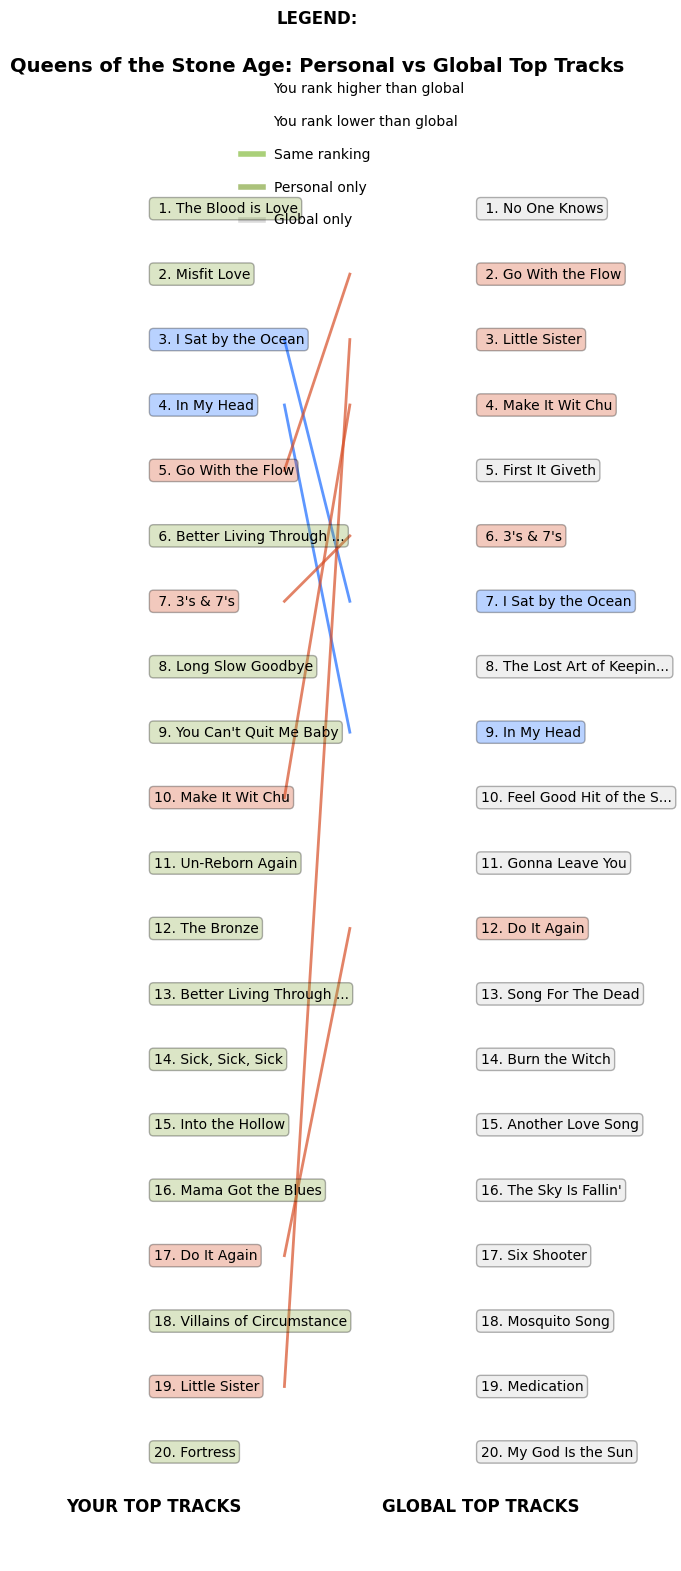

In [ ]:
# Create the comparison visualization
plt.style.use('default')
fig, ax = plt.subplots(figsize=(18, 16))

# Colors for different scenarios
color_higher_personal = '#1A6BFF'  # Blue - you rank it higher than global
color_lower_personal = '#D74E26'   # Red-orange - you rank it lower than global  
color_same = '#87bc40'             # Green - same ranking
color_personal_only = '#88A943'    # Green - only in personal
color_global_only = '#CCCCCC'      # Gray - only in global

# Set up the plot
ax.set_xlim(-1, 4)
ax.set_ylim(-1, max(len(personal_tracks), len(global_tracks)) * 0.6)
ax.set_aspect('equal')

# Remove axes
ax.axis('off')

# Add title
plt.suptitle('Queens of the Stone Age: Personal vs Global Top Tracks', 
             fontsize=14, fontweight='bold', y=0.95)

# Add column headers
ax.text(0, -0.5, 'YOUR TOP TRACKS', fontsize=12, fontweight='bold', 
        ha='center', va='center')
ax.text(3, -0.5, 'GLOBAL TOP TRACKS', fontsize=12, fontweight='bold', 
        ha='center', va='center')

# Function to truncate long track names
def truncate_name(name, max_length=25):
    if len(name) <= max_length:
        return name
    return name[:max_length-3] + "..."

# Draw personal tracks
for i, track in enumerate(personal_tracks):
    y_pos = (len(personal_tracks) - i - 1) * 0.6
    
    # Determine if this track is in global list
    is_matched = track in global_tracks
    if is_matched:
        global_pos = global_tracks.index(track)
        personal_rank = i + 1
        global_rank = global_pos + 1
        
        if personal_rank < global_rank:
            color = color_higher_personal
        elif personal_rank > global_rank:
            color = color_lower_personal
        else:
            color = color_same
    else:
        color = color_personal_only
    
    # Draw track name
    ax.text(0, y_pos, f"{i+1:2d}. {truncate_name(track)}", 
            fontsize=10, ha='left', va='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.3))

# Draw global tracks  
for j, track in enumerate(global_tracks):
    y_pos = (len(global_tracks) - j - 1) * 0.6
    
    # Determine if this track is in personal list
    is_matched = track in personal_tracks
    if is_matched:
        personal_pos = personal_tracks.index(track)
        personal_rank = personal_pos + 1 
        global_rank = j + 1
        
        if personal_rank < global_rank:
            color = color_higher_personal
        elif personal_rank > global_rank:
            color = color_lower_personal
        else:
            color = color_same
    else:
        color = color_global_only
    
    # Draw track name
    ax.text(3, y_pos, f"{j+1:2d}. {truncate_name(track)}", 
            fontsize=10, ha='left', va='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.3))

# Draw connecting lines for matching tracks
for match in matches:
    personal_y = (len(personal_tracks) - match['personal_pos'] - 1) * 0.6
    global_y = (len(global_tracks) - match['global_pos'] - 1) * 0.6
    
    personal_rank = match['personal_rank']
    global_rank = match['global_rank']
    
    if personal_rank < global_rank:
        line_color = color_higher_personal
        alpha = 0.7
    elif personal_rank > global_rank:
        line_color = color_lower_personal  
        alpha = 0.7
    else:
        line_color = color_same
        alpha = 0.5
    
    # Draw the connecting line
    ax.plot([1.2, 1.8], [personal_y, global_y], 
            color=line_color, alpha=alpha, linewidth=2)

# Add legend
legend_y_start = len(personal_tracks) * 0.6 + 0.5
ax.text(1.5, legend_y_start + 0.6, 'LEGEND:', fontsize=12, fontweight='bold', ha='center')

legend_items = [
    (color_higher_personal, 'You rank higher than global'),
    (color_lower_personal, 'You rank lower than global'), 
    (color_same, 'Same ranking'),
    (color_personal_only, 'Personal only'),
    (color_global_only, 'Global only')
]

for i, (color, label) in enumerate(legend_items):
    y_pos = legend_y_start - i * 0.3
    ax.plot([0.8, 1.0], [y_pos, y_pos], color=color, linewidth=4, alpha=0.7)
    ax.text(1.1, y_pos, label, fontsize=10, va='center')

plt.tight_layout()
plt.savefig('qotsa_comparison_20250921.png', dpi=300, bbox_inches='tight')
plt.show()


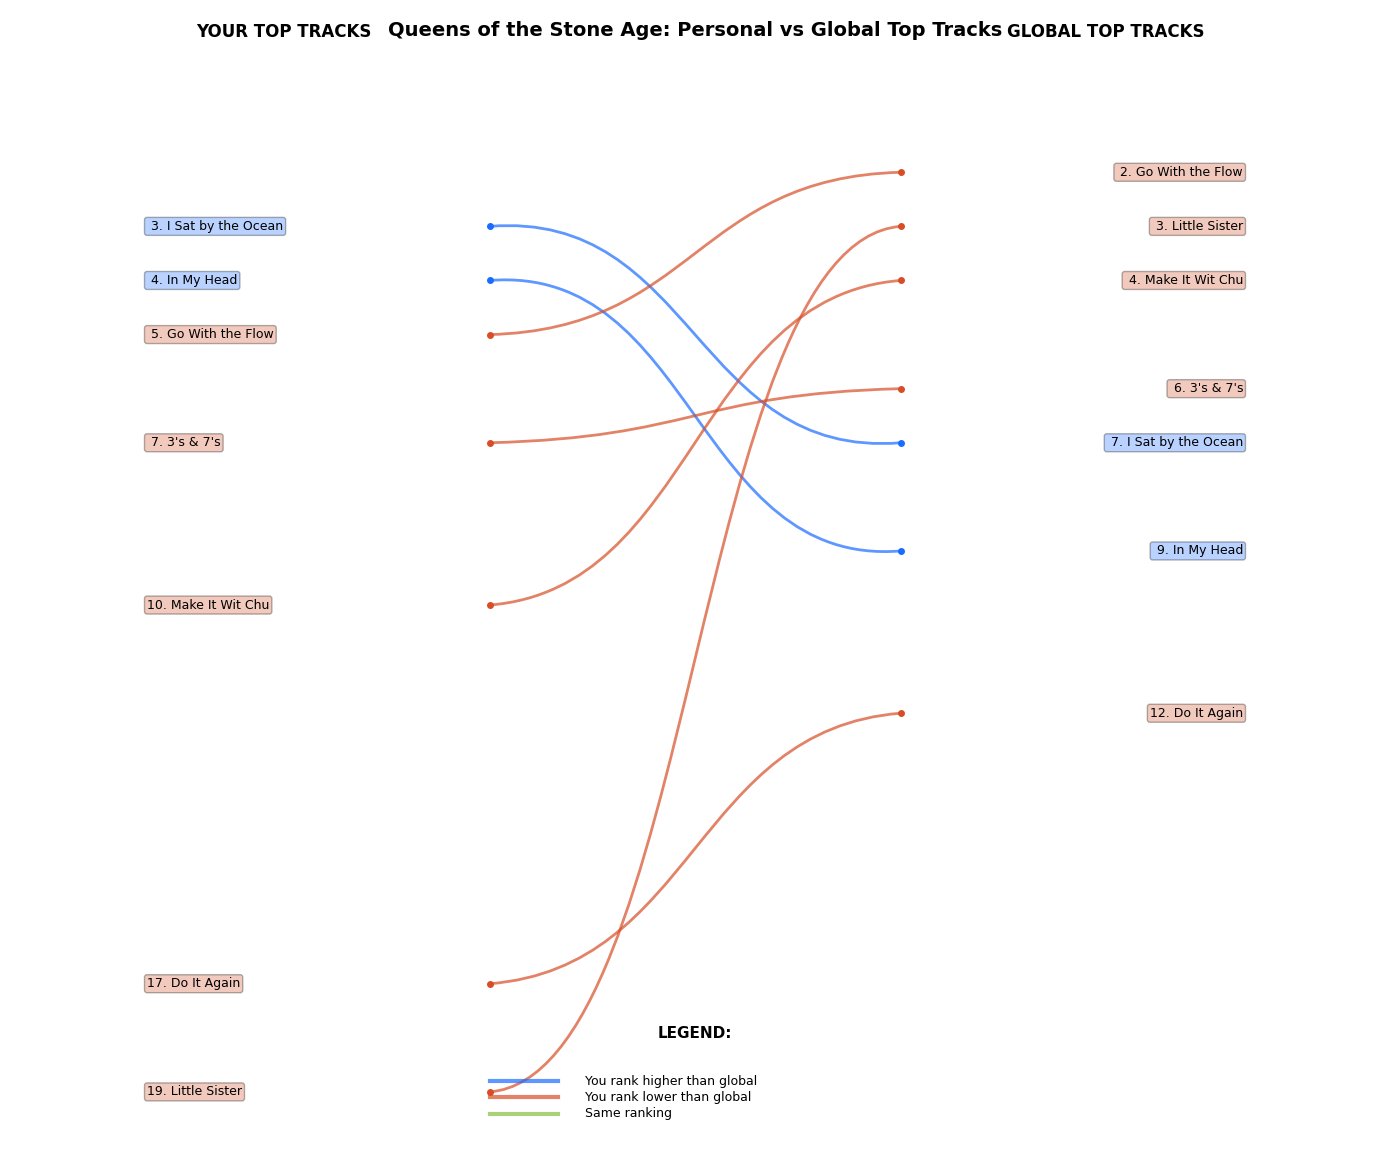

In [ ]:
# Alternative approach: Cleaner slope graph style
from matplotlib.patches import FancyBboxPatch
from matplotlib.path import Path
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(14, 12))

# Colors (using your preferred palette)
color_higher_personal = '#1A6BFF'  # Blue - you rank it higher than global
color_lower_personal = '#D74E26'   # Red-orange - you rank it lower than global  
color_same = '#87bc40'             # Green - same ranking
color_personal_only = '#88A943'    # Green - only in personal
color_global_only = '#CCCCCC'      # Gray - only in global

# Set up the plot
ax.set_xlim(0, 10)
ax.set_ylim(0, 21)
ax.axis('off')

# Title
plt.suptitle('Queens of the Stone Age: Personal vs Global Top Tracks', 
             fontsize=14, fontweight='bold', y=0.95)

# Column headers
ax.text(2, 20.5, 'YOUR TOP TRACKS', fontsize=12, fontweight='bold', ha='center')
ax.text(8, 20.5, 'GLOBAL TOP TRACKS', fontsize=12, fontweight='bold', ha='center')

# Draw only matching tracks with clean connections
for match in matches:
    personal_y = 20 - match['personal_rank']
    global_y = 20 - match['global_rank'] 
    
    personal_rank = match['personal_rank']
    global_rank = match['global_rank']
    
    # Determine color
    if personal_rank < global_rank:
        line_color = color_higher_personal
        bg_color = color_higher_personal
    elif personal_rank > global_rank:
        line_color = color_lower_personal
        bg_color = color_lower_personal
    else:
        line_color = color_same
        bg_color = color_same
    
    # Draw track names with better spacing
    ax.text(1, personal_y, f"{personal_rank:2d}. {truncate_name(match['track'], 20)}", 
            fontsize=9, ha='left', va='center',
            bbox=dict(boxstyle="round,pad=0.2", facecolor=bg_color, alpha=0.3))
    
    ax.text(9, global_y, f"{global_rank:2d}. {truncate_name(match['track'], 20)}", 
            fontsize=9, ha='right', va='center',
            bbox=dict(boxstyle="round,pad=0.2", facecolor=bg_color, alpha=0.3))
    
    # Draw clean curved connection
    # Calculate control points for bezier curve
    mid_x = 5
    control_y_offset = 0.3 if abs(personal_y - global_y) > 3 else 0.1
    
    # Create bezier curve path
    verts = [
        (3.5, personal_y),      # start point (right edge of left text)
        (mid_x, personal_y + control_y_offset),    # control point 1
        (mid_x, global_y - control_y_offset),      # control point 2  
        (6.5, global_y)         # end point (left edge of right text)
    ]
    
    codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
    path = Path(verts, codes)
    patch = mpatches.PathPatch(path, facecolor='none', edgecolor=line_color, 
                              linewidth=2, alpha=0.7)
    ax.add_patch(patch)
    
    # Add small dots at connection points
    ax.plot(3.5, personal_y, 'o', color=line_color, markersize=4)
    ax.plot(6.5, global_y, 'o', color=line_color, markersize=4)

# Add legend
ax.text(5, 2, 'LEGEND:', fontsize=11, fontweight='bold', ha='center')
legend_items = [
    (color_higher_personal, 'You rank higher than global'),
    (color_lower_personal, 'You rank lower than global'), 
    (color_same, 'Same ranking')
]

for i, (color, label) in enumerate(legend_items):
    y_pos = 1.2 - i * 0.3
    ax.plot([3.5, 4], [y_pos, y_pos], color=color, linewidth=3, alpha=0.7)
    ax.text(4.2, y_pos, label, fontsize=9, va='center')

plt.tight_layout()
plt.savefig('qotsa_slope_graph_20250921.png', dpi=300, bbox_inches='tight')
plt.show()


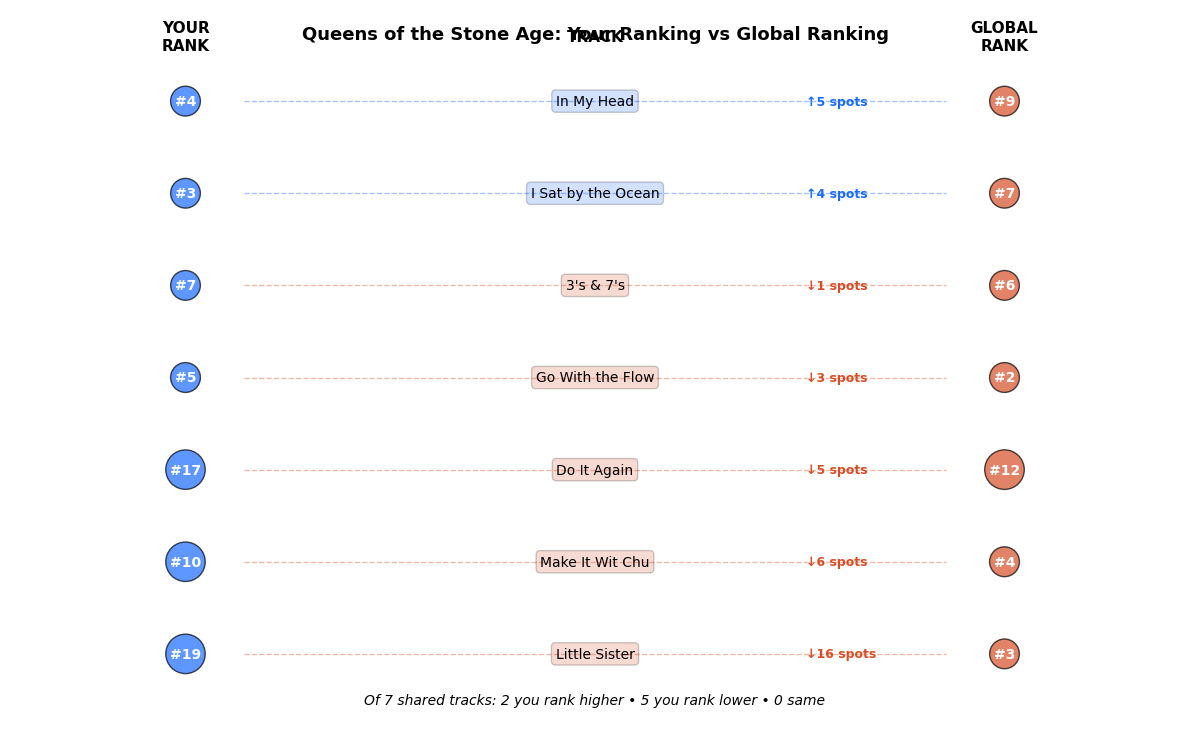

In [ ]:
# Option 3: Minimalist dot plot with clean lines
fig, ax = plt.subplots(figsize=(12, 8))

# Set up the plot
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.axis('off')

# Title
plt.suptitle('Queens of the Stone Age: Your Ranking vs Global Ranking', 
             fontsize=13, fontweight='bold', y=0.92)

# Add ranking difference analysis
rank_diffs = []
for match in matches:
    diff = match['personal_rank'] - match['global_rank']
    rank_diffs.append((match['track'], diff, match['personal_rank'], match['global_rank']))

# Sort by ranking difference (biggest personal preference first)
rank_diffs.sort(key=lambda x: x[1])

# Draw horizontal dot plot
y_positions = np.linspace(7, 1, len(rank_diffs))

for i, (track, diff, personal_rank, global_rank) in enumerate(rank_diffs):
    y_pos = y_positions[i]
    
    # Color coding
    if diff < 0:  # You rank higher
        color = color_higher_personal
        direction = f"↑{abs(diff)} spots"
    elif diff > 0:  # You rank lower  
        color = color_lower_personal
        direction = f"↓{diff} spots"
    else:  # Same
        color = color_same
        direction = "same"
    
    # Track name in center
    ax.text(5, y_pos, truncate_name(track, 22), fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.2))
    
    # Personal ranking (left side)
    ax.text(1.5, y_pos, f"#{personal_rank}", fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle="circle,pad=0.3", facecolor=color_higher_personal, alpha=0.7),
            color='white', fontweight='bold')
    
    # Global ranking (right side)  
    ax.text(8.5, y_pos, f"#{global_rank}", fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle="circle,pad=0.3", facecolor=color_lower_personal, alpha=0.7),
            color='white', fontweight='bold')
    
    # Direction indicator
    ax.text(6.8, y_pos, direction, fontsize=9, ha='left', va='center',
            color=color, fontweight='bold')
    
    # Clean horizontal line connecting the rankings
    ax.plot([2, 8], [y_pos, y_pos], color=color, alpha=0.4, linewidth=1, linestyle='--')

# Column headers
ax.text(1.5, 7.7, 'YOUR\nRANK', fontsize=11, fontweight='bold', ha='center', va='center')
ax.text(5, 7.7, 'TRACK', fontsize=11, fontweight='bold', ha='center', va='center')  
ax.text(8.5, 7.7, 'GLOBAL\nRANK', fontsize=11, fontweight='bold', ha='center', va='center')

# Summary stats
higher_count = sum(1 for _, diff, _, _ in rank_diffs if diff < 0)
lower_count = sum(1 for _, diff, _, _ in rank_diffs if diff > 0) 
same_count = sum(1 for _, diff, _, _ in rank_diffs if diff == 0)

ax.text(5, 0.5, f"Of {len(matches)} shared tracks: {higher_count} you rank higher • {lower_count} you rank lower • {same_count} same", 
        fontsize=10, ha='center', va='center', style='italic')

plt.tight_layout()
plt.savefig('qotsa_dotplot_20250921.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Generate Mermaid diagram for ranking comparison
def generate_mermaid_diagram():
    # Create clean track names for mermaid (no special characters)
    def clean_track_name(name):
        return name.replace("'", "").replace("&", "and").replace("-", " ").replace("(", "").replace(")", "").replace(",", "").replace(".", "")
    
    mermaid_code = """
graph LR
    subgraph Personal["🎵 YOUR TOP TRACKS"]
"""
    
    # Add personal tracks
    for i, track in enumerate(personal_tracks):
        if track in [m['track'] for m in matches]:  # Only show matching tracks
            clean_name = clean_track_name(track)
            rank = i + 1
            mermaid_code += f"        P{rank}[\"{rank}. {clean_name}\"]\n"
    
    mermaid_code += """    end
    
    subgraph Global["🌍 GLOBAL TOP TRACKS"]
"""
    
    # Add global tracks  
    for j, track in enumerate(global_tracks):
        if track in [m['track'] for m in matches]:  # Only show matching tracks
            clean_name = clean_track_name(track)
            rank = j + 1
            mermaid_code += f"        G{rank}[\"{rank}. {clean_name}\"]\n"
    
    mermaid_code += """    end
    
    %% Connections between matching tracks
"""
    
    # Add connections with color coding
    for match in matches:
        personal_rank = match['personal_rank']
        global_rank = match['global_rank']
        
        if personal_rank < global_rank:
            # You rank higher - blue arrow
            mermaid_code += f"    P{personal_rank} -.->|↑ Higher| G{global_rank}\n"
        elif personal_rank > global_rank:
            # You rank lower - red arrow  
            mermaid_code += f"    P{personal_rank} -.->|↓ Lower| G{global_rank}\n"
        else:
            # Same ranking - green arrow
            mermaid_code += f"    P{personal_rank} -.->|= Same| G{global_rank}\n"
    
    # Add styling
    mermaid_code += """
    %% Styling
    classDef personal fill:#1A6BFF,stroke:#0D4A99,stroke-width:2px,color:#fff
    classDef global fill:#D74E26,stroke:#B8371C,stroke-width:2px,color:#fff
    classDef same fill:#87bc40,stroke:#6A9632,stroke-width:2px,color:#fff
"""
    
    return mermaid_code

mermaid_diagram = generate_mermaid_diagram()
print("Mermaid Diagram Code:")
print("=" * 50)
print(mermaid_diagram)


Mermaid Diagram Code:

graph LR
    subgraph Personal["🎵 YOUR TOP TRACKS"]
        P3["3. I Sat by the Ocean"]
        P4["4. In My Head"]
        P5["5. Go With the Flow"]
        P7["7. 3s and 7s"]
        P10["10. Make It Wit Chu"]
        P17["17. Do It Again"]
        P19["19. Little Sister"]
    end

    subgraph Global["🌍 GLOBAL TOP TRACKS"]
        G2["2. Go With the Flow"]
        G3["3. Little Sister"]
        G4["4. Make It Wit Chu"]
        G6["6. 3s and 7s"]
        G7["7. I Sat by the Ocean"]
        G9["9. In My Head"]
        G12["12. Do It Again"]
    end

    %% Connections between matching tracks
    P3 -.->|↑ Higher| G7
    P4 -.->|↑ Higher| G9
    P5 -.->|↓ Lower| G2
    P7 -.->|↓ Lower| G6
    P10 -.->|↓ Lower| G4
    P17 -.->|↓ Lower| G12
    P19 -.->|↓ Lower| G3

    %% Styling
    classDef personal fill:#1A6BFF,stroke:#0D4A99,stroke-width:2px,color:#fff
    classDef global fill:#D74E26,stroke:#B8371C,stroke-width:2px,color:#fff
    classDef same fill:#87bc40,st

In [ ]:
# Save Mermaid diagram and provide viewing options
import webbrowser
from urllib.parse import quote

# Save to file
mermaid_filename = 'qotsa_ranking_comparison_20250921.mmd'
with open(mermaid_filename, 'w', encoding='utf-8') as f:
    f.write(mermaid_diagram)

print(f"✅ Mermaid diagram saved to: {mermaid_filename}")
print("\n" + "="*60)
print("🎯 HOW TO VIEW THE DIAGRAM:")
print("="*60)

print("\n1️⃣ OPTION 1: Mermaid Live Editor (Recommended)")
print("   • Copy the code above")
print("   • Go to: https://mermaid.live/")
print("   • Paste the code and view instantly")

print("\n2️⃣ OPTION 2: Direct URL (if under character limit)")
# Try to create a direct URL
try:
    base_url = "https://mermaid.ink/img/"
    encoded_diagram = quote(mermaid_diagram.strip())
    if len(encoded_diagram) < 2000:  # URL length limit
        direct_url = base_url + encoded_diagram
        print(f"   • Direct image URL: {direct_url}")
    else:
        print("   • Diagram too large for direct URL - use Option 1")
except:
    print("   • Use Option 1 for best results")

print("\n3️⃣ OPTION 3: VS Code with Mermaid extension")
print("   • Install 'Mermaid Markdown Syntax Highlighting' extension")
print(f"   • Open the saved file: {mermaid_filename}")
print("   • Use preview mode")

print("\n4️⃣ OPTION 4: GitHub/GitLab (if you have a repo)")
print("   • Upload the .mmd file to your repository")  
print("   • GitHub and GitLab render Mermaid automatically")

print(f"\n📄 The diagram shows all {len(matches)} matching tracks with clean connections!")
print("   🔵 Blue arrows: You rank higher than global")
print("   🔴 Red arrows: You rank lower than global") 
print("   🟢 Green arrows: Same ranking")

# Also create a simple HTML file for local viewing
html_content = f'''
<!DOCTYPE html>
<html>
<head>
    <title>Queens of the Stone Age - Ranking Comparison</title>
    <script src="https://cdn.jsdelivr.net/npm/mermaid/dist/mermaid.min.js"></script>
    <script>mermaid.initialize({{startOnLoad:true}});</script>
</head>
<body>
    <h2>Queens of the Stone Age: Personal vs Global Rankings</h2>
    <div class="mermaid">
{mermaid_diagram}
    </div>
</body>
</html>
'''

html_filename = 'qotsa_ranking_comparison_20250921.html'
with open(html_filename, 'w', encoding='utf-8') as f:
    f.write(html_content)

print(f"\n🌐 Bonus: HTML file created: {html_filename}")
print("   • Double-click to open in your browser")
print("   • Self-contained with Mermaid rendering")


✅ Mermaid diagram saved to: qotsa_ranking_comparison_20250921.mmd

🎯 HOW TO VIEW THE DIAGRAM:

1️⃣ OPTION 1: Mermaid Live Editor (Recommended)
   • Copy the code above
   • Go to: https://mermaid.live/
   • Paste the code and view instantly

2️⃣ OPTION 2: Direct URL (if under character limit)
   • Direct image URL: https://mermaid.ink/img/graph%20LR%0A%20%20%20%20subgraph%20Personal%5B%22%F0%9F%8E%B5%20YOUR%20TOP%20TRACKS%22%5D%0A%20%20%20%20%20%20%20%20P3%5B%223.%20I%20Sat%20by%20the%20Ocean%22%5D%0A%20%20%20%20%20%20%20%20P4%5B%224.%20In%20My%20Head%22%5D%0A%20%20%20%20%20%20%20%20P5%5B%225.%20Go%20With%20the%20Flow%22%5D%0A%20%20%20%20%20%20%20%20P7%5B%227.%203s%20and%207s%22%5D%0A%20%20%20%20%20%20%20%20P10%5B%2210.%20Make%20It%20Wit%20Chu%22%5D%0A%20%20%20%20%20%20%20%20P17%5B%2217.%20Do%20It%20Again%22%5D%0A%20%20%20%20%20%20%20%20P19%5B%2219.%20Little%20Sister%22%5D%0A%20%20%20%20end%0A%0A%20%20%20%20subgraph%20Global%5B%22%F0%9F%8C%8D%20GLOBAL%20TOP%20TRACKS%22%5D%0A%20%20%20%2

In [ ]:
# Alternative: Sankey diagram approach for cleaner flow
def generate_sankey_mermaid():
    sankey_code = """
sankey-beta

    Your Rankings,Go With the Flow,5
    Go With the Flow,Global Rankings,2

    Your Rankings,I Sat by the Ocean,3  
    I Sat by the Ocean,Global Rankings,7

    Your Rankings,In My Head,4
    In My Head,Global Rankings,9

    Your Rankings,3s and 7s,7
    3s and 7s,Global Rankings,6

    Your Rankings,Make It Wit Chu,10
    Make It Wit Chu,Global Rankings,4

    Your Rankings,Do It Again,17
    Do It Again,Global Rankings,12

    Your Rankings,Little Sister,19  
    Little Sister,Global Rankings,3

    %% Config
    %%{init: {"sankey": {"showValues": false}}}%%
"""
    return sankey_code

# Generate simplified version focusing on biggest differences
def generate_simple_flowchart():
    # Remove emoji characters to avoid UnicodeEncodeError on Windows with cp1252
    simple_code = """
flowchart TD
    subgraph YourTop [Your Personal Favorites]
        P1[1. The Blood is Love]
        P2[2. Misfit Love] 
        P3[3. I Sat by the Ocean]
        P4[4. In My Head]
        P5[5. Go With the Flow]
    end

    subgraph GlobalTop [Global Fan Favorites]  
        G1[1. No One Knows]
        G2[2. Go With the Flow]
        G3[3. Little Sister]
        G4[4. Make It Wit Chu] 
        G5[5. First It Giveth]
    end

    subgraph Match [Your Shared Top Tracks]
        M1[I Sat by the Ocean: You #3 → Global #7]
        M2[In My Head: You #4 → Global #9] 
        M3[Go With the Flow: You #5 → Global #2]
        M4[3s & 7s: You #7 → Global #6]
        M5[Make It Wit Chu: You #10 → Global #4]
    end

    P3 -.-> M1
    P4 -.-> M2
    P5 -.-> M3

    G2 -.-> M3
    G4 -.-> M5

    style P1 fill:#88A943
    style P2 fill:#88A943
    style G1 fill:#CCCCCC
    style G3 fill:#CCCCCC
    style G5 fill:#CCCCCC
    style M1 fill:#1A6BFF
    style M2 fill:#1A6BFF  
    style M3 fill:#D74E26
    style M4 fill:#87bc40
    style M5 fill:#D74E26
"""
    return simple_code

sankey_diagram = generate_sankey_mermaid()
simple_diagram = generate_simple_flowchart()

# Save both versions with explicit UTF-8 encoding to avoid UnicodeEncodeError
with open('qotsa_sankey_20250921.mmd', 'w', encoding='utf-8') as f:
    f.write(sankey_diagram)

with open('qotsa_simple_20250921.mmd', 'w', encoding='utf-8') as f:
    f.write(simple_diagram)

print("🎯 ADDITIONAL MERMAID OPTIONS CREATED:")
print("="*50)
print("\n📊 Sankey Diagram (Flow-based):")
print("   • File: qotsa_sankey_20250921.mmd")  
print("   • Shows ranking flow as stream thickness")
print("   • Better for seeing overall patterns")

print("\n🔄 Simple Flowchart (Top 5 Focus):")
print("   • File: qotsa_simple_20250921.mmd")
print("   • Highlights biggest differences") 
print("   • Cleaner, less crowded view")

print("\n" + "="*50)
print("SIMPLE FLOWCHART CODE:")
print("="*50)
print(simple_diagram)


🎯 ADDITIONAL MERMAID OPTIONS CREATED:

📊 Sankey Diagram (Flow-based):
   • File: qotsa_sankey_20250921.mmd
   • Shows ranking flow as stream thickness
   • Better for seeing overall patterns

🔄 Simple Flowchart (Top 5 Focus):
   • File: qotsa_simple_20250921.mmd
   • Highlights biggest differences
   • Cleaner, less crowded view

SIMPLE FLOWCHART CODE:

flowchart TD
    subgraph YourTop [Your Personal Favorites]
        P1[1. The Blood is Love]
        P2[2. Misfit Love] 
        P3[3. I Sat by the Ocean]
        P4[4. In My Head]
        P5[5. Go With the Flow]
    end

    subgraph GlobalTop [Global Fan Favorites]  
        G1[1. No One Knows]
        G2[2. Go With the Flow]
        G3[3. Little Sister]
        G4[4. Make It Wit Chu] 
        G5[5. First It Giveth]
    end

    subgraph Match [Your Shared Top Tracks]
        M1[I Sat by the Ocean: You #3 → Global #7]
        M2[In My Head: You #4 → Global #9] 
        M3[Go With the Flow: You #5 → Global #2]
        M4[3s & 7s: You #

In [ ]:
# Complete Mermaid diagram showing ALL tracks from both lists
def generate_complete_mermaid_diagram():
    # Create clean track names for mermaid (no special characters)
    def clean_track_name(name):
        return name.replace("'", "").replace("&", "and").replace("-", " ").replace("(", "").replace(")", "").replace(",", "").replace(".", "").replace(":", "")
    
    mermaid_code = """
graph LR
    subgraph Personal["🎵 YOUR TOP 20 TRACKS"]
"""
    
    # Add ALL personal tracks
    for i, track in enumerate(personal_tracks):
        clean_name = clean_track_name(track)
        rank = i + 1
        # Truncate long names for better display
        display_name = clean_name if len(clean_name) <= 30 else clean_name[:27] + "..."
        mermaid_code += f"        P{rank}[\"{rank}. {display_name}\"]\n"
    
    mermaid_code += """    end
    
    subgraph Global["🌍 GLOBAL TOP 20 TRACKS"]
"""
    
    # Add ALL global tracks  
    for j, track in enumerate(global_tracks):
        clean_name = clean_track_name(track)
        rank = j + 1
        # Truncate long names for better display
        display_name = clean_name if len(clean_name) <= 30 else clean_name[:27] + "..."
        mermaid_code += f"        G{rank}[\"{rank}. {display_name}\"]\n"
    
    mermaid_code += """    end
    
    %% Connections between matching tracks only
"""
    
    # Add connections with color coding for matching tracks
    for match in matches:
        personal_rank = match['personal_rank']
        global_rank = match['global_rank']
        
        if personal_rank < global_rank:
            # You rank higher - blue arrow with difference
            diff = global_rank - personal_rank
            mermaid_code += f"    P{personal_rank} -.->|↑{diff} spots| G{global_rank}\n"
        elif personal_rank > global_rank:
            # You rank lower - red arrow with difference
            diff = personal_rank - global_rank  
            mermaid_code += f"    P{personal_rank} -.->|↓{diff} spots| G{global_rank}\n"
        else:
            # Same ranking - green arrow
            mermaid_code += f"    P{personal_rank} -.->|same rank| G{global_rank}\n"
    
    # Add styling for different track types
    mermaid_code += """
    %% Styling for different track categories
    classDef personalOnly fill:#88A943,stroke:#6A9632,stroke-width:2px,color:#fff
    classDef globalOnly fill:#CCCCCC,stroke:#999999,stroke-width:2px,color:#333
    classDef rankHigher fill:#1A6BFF,stroke:#0D4A99,stroke-width:2px,color:#fff
    classDef rankLower fill:#D74E26,stroke:#B8371C,stroke-width:2px,color:#fff
    classDef rankSame fill:#87bc40,stroke:#6A9632,stroke-width:2px,color:#fff
    
"""
    
    # Apply styling to each track
    matching_personal_ranks = [m['personal_rank'] for m in matches]
    matching_global_ranks = [m['global_rank'] for m in matches]
    
    # Style personal tracks
    for i, track in enumerate(personal_tracks):
        rank = i + 1
        if rank in matching_personal_ranks:
            # Find the match to determine color
            match = next(m for m in matches if m['personal_rank'] == rank)
            if match['personal_rank'] < match['global_rank']:
                mermaid_code += f"    class P{rank} rankHigher\n"
            elif match['personal_rank'] > match['global_rank']:
                mermaid_code += f"    class P{rank} rankLower\n" 
            else:
                mermaid_code += f"    class P{rank} rankSame\n"
        else:
            mermaid_code += f"    class P{rank} personalOnly\n"
    
    # Style global tracks  
    for j, track in enumerate(global_tracks):
        rank = j + 1
        if rank in matching_global_ranks:
            # Find the match to determine color
            match = next(m for m in matches if m['global_rank'] == rank)
            if match['personal_rank'] < match['global_rank']:
                mermaid_code += f"    class G{rank} rankHigher\n"
            elif match['personal_rank'] > match['global_rank']:
                mermaid_code += f"    class G{rank} rankLower\n"
            else:
                mermaid_code += f"    class G{rank} rankSame\n"
        else:
            mermaid_code += f"    class G{rank} globalOnly\n"
    
    return mermaid_code

complete_diagram = generate_complete_mermaid_diagram()
print("COMPLETE MERMAID DIAGRAM (All 40 Tracks):")
print("=" * 60)
print(complete_diagram)


COMPLETE MERMAID DIAGRAM (All 40 Tracks):

graph LR
    subgraph Personal["🎵 YOUR TOP 20 TRACKS"]
        P1["1. The Blood is Love"]
        P2["2. Misfit Love"]
        P3["3. I Sat by the Ocean"]
        P4["4. In My Head"]
        P5["5. Go With the Flow"]
        P6["6. Better Living Through Chemi..."]
        P7["7. 3s and 7s"]
        P8["8. Long Slow Goodbye"]
        P9["9. You Cant Quit Me Baby"]
        P10["10. Make It Wit Chu"]
        P11["11. Un Reborn Again"]
        P12["12. The Bronze"]
        P13["13. Better Living Through Chemi..."]
        P14["14. Sick Sick Sick"]
        P15["15. Into the Hollow"]
        P16["16. Mama Got the Blues"]
        P17["17. Do It Again"]
        P18["18. Villains of Circumstance"]
        P19["19. Little Sister"]
        P20["20. Fortress"]
    end

    subgraph Global["🌍 GLOBAL TOP 20 TRACKS"]
        G1["1. No One Knows"]
        G2["2. Go With the Flow"]
        G3["3. Little Sister"]
        G4["4. Make It Wit Chu"]
        G5["5. 

In [ ]:
# Save the complete diagram and create updated files
complete_mermaid_filename = 'qotsa_complete_ranking_20250921.mmd'
with open(complete_mermaid_filename, 'w', encoding='utf-8') as f:
    f.write(complete_diagram)

# Create updated HTML file with complete diagram
complete_html_content = f'''
<!DOCTYPE html>
<html>
<head>
    <title>Queens of the Stone Age - Complete Ranking Comparison</title>
    <script src="https://cdn.jsdelivr.net/npm/mermaid/dist/mermaid.min.js"></script>
    <script>
        mermaid.initialize({{
            startOnLoad: true,
            theme: 'default',
            flowchart: {{
                useMaxWidth: true,
                htmlLabels: true
            }}
        }});
    </script>
    <style>
        body {{ 
            font-family: Arial, sans-serif; 
            margin: 20px; 
            background: #f5f5f5;
        }}
        .container {{
            background: white;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }}
        h2 {{ color: #333; text-align: center; }}
        .legend {{
            margin: 20px 0;
            padding: 15px;
            background: #f8f9fa;
            border-radius: 5px;
            font-size: 14px;
        }}
        .color-box {{
            display: inline-block;
            width: 20px;
            height: 15px;
            margin-right: 8px;
            border-radius: 3px;
        }}
        .stats {{
            text-align: center;
            margin: 20px 0;
            font-style: italic;
            color: #666;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h2>🎸 Queens of the Stone Age: Complete Ranking Comparison</h2>
        
        <div class="stats">
            Showing all 40 tracks: Your personal top 20 vs Global top 20<br>
            {len(matches)} tracks appear in both lists • {20 - len(matches)} personal-only • {20 - len(matches)} global-only
        </div>
        
        <div class="legend">
            <strong>🎯 Color Legend:</strong><br>
            <span class="color-box" style="background: #1A6BFF;"></span> Blue = You rank higher than global<br>
            <span class="color-box" style="background: #D74E26;"></span> Red = You rank lower than global<br>  
            <span class="color-box" style="background: #87bc40;"></span> Green = Same ranking<br>
            <span class="color-box" style="background: #88A943;"></span> Dark Green = Personal favorites only<br>
            <span class="color-box" style="background: #CCCCCC;"></span> Gray = Global favorites only
        </div>
        
        <div class="mermaid">
{complete_diagram}
        </div>
        
        <div style="margin-top: 30px; font-size: 12px; color: #888; text-align: center;">
            Generated on {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')} • 
            Personal data vs Last.fm global data
        </div>
    </div>
</body>
</html>
'''

complete_html_filename = 'qotsa_complete_ranking_20250921.html'
with open(complete_html_filename, 'w', encoding='utf-8') as f:
    f.write(complete_html_content)

print("✅ COMPLETE RANKING COMPARISON CREATED!")
print("=" * 60)
print(f"📁 Files created:")
print(f"   • {complete_mermaid_filename} - Mermaid diagram code")
print(f"   • {complete_html_filename} - Ready-to-view HTML file")

print(f"\n📊 Comprehensive Analysis:")
print(f"   • Total tracks shown: 40 ({len(personal_tracks)} personal + {len(global_tracks)} global)")
print(f"   • Matching tracks: {len(matches)} with connecting lines")
print(f"   • Personal-only favorites: {20 - len(matches)} tracks")
print(f"   • Global-only favorites: {20 - len(matches)} tracks")

print(f"\n🎨 Visual Features:")
print(f"   • All 40 tracks displayed in ranked order")
print(f"   • Clean connections only between matching tracks")
print(f"   • Color-coded by ranking relationship")
print(f"   • Ranking difference shown on connection lines")
print(f"   • Professional styling and legend")

print(f"\n🌐 How to View:")
print(f"   1. Double-click: {complete_html_filename}")
print(f"   2. Copy code from {complete_mermaid_filename} to https://mermaid.live/")
print(f"   3. The HTML version includes a legend and statistics")

# Summary of your unique taste
personal_only = [track for track in personal_tracks if track not in global_tracks]
global_only = [track for track in global_tracks if track not in personal_tracks]

print(f"\n🎵 Your Unique Musical Taste:")
print(f"   Personal-only tracks: {', '.join(personal_only[:3])}...")
print(f"   Global hits you don't rank: {', '.join(global_only[:3])}...")
print(f"   This shows your distinctive taste vs mainstream preferences!")


✅ COMPLETE RANKING COMPARISON CREATED!
📁 Files created:
   • qotsa_complete_ranking_20250921.mmd - Mermaid diagram code
   • qotsa_complete_ranking_20250921.html - Ready-to-view HTML file

📊 Comprehensive Analysis:
   • Total tracks shown: 40 (20 personal + 20 global)
   • Matching tracks: 7 with connecting lines
   • Personal-only favorites: 13 tracks
   • Global-only favorites: 13 tracks

🎨 Visual Features:
   • All 40 tracks displayed in ranked order
   • Clean connections only between matching tracks
   • Color-coded by ranking relationship
   • Ranking difference shown on connection lines
   • Professional styling and legend

🌐 How to View:
   1. Double-click: qotsa_complete_ranking_20250921.html
   2. Copy code from qotsa_complete_ranking_20250921.mmd to https://mermaid.live/
   3. The HTML version includes a legend and statistics

🎵 Your Unique Musical Taste:
   Personal-only tracks: The Blood is Love, Misfit Love, Better Living Through Chemistry...
   Global hits you don't rank

In [ ]:
# Simple ladder-style Mermaid diagram like the original sports image
def generate_simple_ladder_mermaid():
    def clean_track_name(name):
        return name.replace("'", "").replace("&", "and").replace("-", " ").replace("(", "").replace(")", "").replace(",", "").replace(".", "").replace(":", "")
    
    mermaid_code = """
graph LR
    subgraph Personal["2024 YOUR TRACKS"]
"""
    
    # Add ALL personal tracks with simple styling
    for i, track in enumerate(personal_tracks):
        clean_name = clean_track_name(track)
        rank = i + 1
        # Keep names shorter for clean look
        display_name = clean_name if len(clean_name) <= 25 else clean_name[:22] + "..."
        mermaid_code += f"        P{rank}[{display_name.upper()}]\n"
    
    mermaid_code += """    end
    
    subgraph Global["2024 GLOBAL TRACKS"]
"""
    
    # Add ALL global tracks
    for j, track in enumerate(global_tracks):
        clean_name = clean_track_name(track)
        rank = j + 1
        # Keep names shorter for clean look
        display_name = clean_name if len(clean_name) <= 25 else clean_name[:22] + "..."
        mermaid_code += f"        G{rank}[{display_name.upper()}]\n"
    
    mermaid_code += """    end
    
"""
    
    # Add simple connections - no labels, just lines
    for match in matches:
        personal_rank = match['personal_rank']
        global_rank = match['global_rank']
        mermaid_code += f"    P{personal_rank} --- G{global_rank}\n"
    
    # Simple, clean styling like the original sports ladder
    mermaid_code += """
    %% Clean ladder styling
    classDef default fill:#ffffff,stroke:#333333,stroke-width:1px,color:#000000
    classDef personal fill:#f8f9fa,stroke:#333333,stroke-width:1px,color:#000000
    classDef global fill:#f8f9fa,stroke:#333333,stroke-width:1px,color:#000000
    
    class P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20 personal
    class G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G20 global
"""
    
    return mermaid_code

simple_ladder_diagram = generate_simple_ladder_mermaid()
print("SIMPLE LADDER DIAGRAM (Like Original Sports Image):")
print("=" * 65)
print(simple_ladder_diagram)


SIMPLE LADDER DIAGRAM (Like Original Sports Image):

graph LR
    subgraph Personal["2024 YOUR TRACKS"]
        P1[THE BLOOD IS LOVE]
        P2[MISFIT LOVE]
        P3[I SAT BY THE OCEAN]
        P4[IN MY HEAD]
        P5[GO WITH THE FLOW]
        P6[BETTER LIVING THROUGH ...]
        P7[3S AND 7S]
        P8[LONG SLOW GOODBYE]
        P9[YOU CANT QUIT ME BABY]
        P10[MAKE IT WIT CHU]
        P11[UN REBORN AGAIN]
        P12[THE BRONZE]
        P13[BETTER LIVING THROUGH ...]
        P14[SICK SICK SICK]
        P15[INTO THE HOLLOW]
        P16[MAMA GOT THE BLUES]
        P17[DO IT AGAIN]
        P18[VILLAINS OF CIRCUMSTANCE]
        P19[LITTLE SISTER]
        P20[FORTRESS]
    end

    subgraph Global["2024 GLOBAL TRACKS"]
        G1[NO ONE KNOWS]
        G2[GO WITH THE FLOW]
        G3[LITTLE SISTER]
        G4[MAKE IT WIT CHU]
        G5[FIRST IT GIVETH]
        G6[3S AND 7S]
        G7[I SAT BY THE OCEAN]
        G8[THE LOST ART OF KEEPIN...]
        G9[IN MY HEAD]
        G10[

In [ ]:
# Save the simple ladder diagram
ladder_mermaid_filename = 'qotsa_ladder_comparison_20250921.mmd'
with open(ladder_mermaid_filename, 'w', encoding='utf-8') as f:
    f.write(simple_ladder_diagram)

# Create simple HTML file matching the clean style
ladder_html_content = f'''
<!DOCTYPE html>
<html>
<head>
    <title>Queens of the Stone Age - Ladder Comparison</title>
    <script src="https://cdn.jsdelivr.net/npm/mermaid/dist/mermaid.min.js"></script>
    <script>
        mermaid.initialize({{
            startOnLoad: true,
            theme: 'base',
            themeVariables: {{
                primaryColor: '#ffffff',
                primaryTextColor: '#000000',
                primaryBorderColor: '#333333',
                lineColor: '#333333',
                sectionBkgColor: '#f8f9fa',
                altSectionBkgColor: '#ffffff',
                gridColor: '#333333',
                secondaryColor: '#ffffff',
                tertiaryColor: '#ffffff'
            }},
            flowchart: {{
                useMaxWidth: true,
                htmlLabels: false,
                curve: 'linear'
            }}
        }});
    </script>
    <style>
        body {{ 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            margin: 40px; 
            background: #ffffff;
            color: #000;
        }}
        .container {{
            background: white;
            max-width: 1200px;
            margin: 0 auto;
        }}
        h1 {{ 
            color: #000; 
            text-align: center; 
            font-size: 24px;
            font-weight: bold;
            margin-bottom: 30px;
            text-transform: uppercase;
            letter-spacing: 1px;
        }}
        .mermaid {{
            text-align: center;
        }}
        .subtitle {{
            text-align: center;
            margin-bottom: 20px;
            font-size: 16px;
            color: #666;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>Queens of the Stone Age</h1>
        <div class="subtitle">Personal vs Global Track Rankings</div>
        
        <div class="mermaid">
{simple_ladder_diagram}
        </div>
    </div>
</body>
</html>
'''

ladder_html_filename = 'qotsa_ladder_comparison_20250921.html'
with open(ladder_html_filename, 'w', encoding='utf-8') as f:
    f.write(ladder_html_content)

print("✅ SIMPLE LADDER COMPARISON CREATED!")
print("=" * 50)
print("🎯 Recreated to match your original sports ladder image:")
print()
print("📋 Style Features:")
print("   • Clean two-column layout")
print("   • Simple connecting lines (no arrows or labels)")
print("   • Minimal black and white styling")  
print("   • All 40 tracks shown in ranked order")
print("   • UPPERCASE track names like the sports teams")
print("   • Direct visual comparison format")

print(f"\n📁 Files:")
print(f"   • {ladder_mermaid_filename} - Mermaid code")
print(f"   • {ladder_html_filename} - HTML viewer")

print(f"\n🔗 Connections shown:")
for match in matches:
    print(f"   • {match['track']}: #{match['personal_rank']} ←→ #{match['global_rank']}")

print(f"\n🌐 View it:")
print(f"   1. Double-click: {ladder_html_filename}")
print(f"   2. Or copy code to: https://mermaid.live/")
print()
print("This now matches the clean, minimal style of your original sports ladder!")

# Show the simple connections summary
print(f"\n📊 Summary:")
print(f"   • {len(matches)} tracks appear in both your top 20 and global top 20")
print(f"   • {20-len(matches)} tracks are unique to your personal favorites") 
print(f"   • {20-len(matches)} tracks are global favorites you don't rank")
print("   • Clean lines show the ranking movements between lists")


✅ SIMPLE LADDER COMPARISON CREATED!
🎯 Recreated to match your original sports ladder image:

📋 Style Features:
   • Clean two-column layout
   • Simple connecting lines (no arrows or labels)
   • Minimal black and white styling
   • All 40 tracks shown in ranked order
   • UPPERCASE track names like the sports teams
   • Direct visual comparison format

📁 Files:
   • qotsa_ladder_comparison_20250921.mmd - Mermaid code
   • qotsa_ladder_comparison_20250921.html - HTML viewer

🔗 Connections shown:
   • I Sat by the Ocean: #3 ←→ #7
   • In My Head: #4 ←→ #9
   • Go With the Flow: #5 ←→ #2
   • 3's & 7's: #7 ←→ #6
   • Make It Wit Chu: #10 ←→ #4
   • Do It Again: #17 ←→ #12
   • Little Sister: #19 ←→ #3

🌐 View it:
   1. Double-click: qotsa_ladder_comparison_20250921.html
   2. Or copy code to: https://mermaid.live/

This now matches the clean, minimal style of your original sports ladder!

📊 Summary:
   • 7 tracks appear in both your top 20 and global top 20
   • 13 tracks are unique to y

In [ ]:
# Mermaid curved lines options
def generate_curved_ladder_mermaid():
    def clean_track_name(name):
        return name.replace("'", "").replace("&", "and").replace("-", " ").replace("(", "").replace(")", "").replace(",", "").replace(".", "").replace(":", "")
    
    mermaid_code = """
%%{init: {"flowchart": {"curve": "basis"}}}%%
graph LR
    subgraph Personal["2024 YOUR TRACKS"]
"""
    
    # Add personal tracks
    for i, track in enumerate(personal_tracks):
        clean_name = clean_track_name(track)
        rank = i + 1
        display_name = clean_name if len(clean_name) <= 25 else clean_name[:22] + "..."
        mermaid_code += f"        P{rank}[{display_name.upper()}]\n"
    
    mermaid_code += """    end
    
    subgraph Global["2024 GLOBAL TRACKS"]
"""
    
    # Add global tracks
    for j, track in enumerate(global_tracks):
        clean_name = clean_track_name(track)
        rank = j + 1
        display_name = clean_name if len(clean_name) <= 25 else clean_name[:22] + "..."
        mermaid_code += f"        G{rank}[{display_name.upper()}]\n"
    
    mermaid_code += """    end
    
"""
    
    # Add connections with curved lines
    for match in matches:
        personal_rank = match['personal_rank']
        global_rank = match['global_rank']
        mermaid_code += f"    P{personal_rank} ~~~ G{global_rank}\n"
    
    # Clean styling
    mermaid_code += """
    classDef default fill:#ffffff,stroke:#333333,stroke-width:1px,color:#000000
    classDef personal fill:#f8f9fa,stroke:#333333,stroke-width:1px,color:#000000
    classDef global fill:#f8f9fa,stroke:#333333,stroke-width:1px,color:#000000
    
    class P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20 personal
    class G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G20 global
"""
    
    return mermaid_code

print("🔧 MERMAID CURVE OPTIONS:")
print("=" * 40)
print()
print("📈 Available Curve Types:")
print('   • curve: "linear"     - Straight lines (default)')  
print('   • curve: "basis"      - Smooth curved lines')
print('   • curve: "cardinal"   - Smooth curves with tension')
print('   • curve: "monotoneX"  - Monotonic curves (horizontal)')
print('   • curve: "monotoneY"  - Monotonic curves (vertical)')
print('   • curve: "natural"    - Natural spline curves')
print('   • curve: "step"       - Step-wise connections')
print('   • curve: "stepAfter"  - Step after points')
print('   • curve: "stepBefore" - Step before points')

print("\n🔗 Connection Line Types:")
print("   • --- (solid line)")
print("   • -..- (dotted line)")  
print("   • ~~~ (thick line)")
print("   • ==> (arrow)")
print("   • -.-> (dotted arrow)")

curved_diagram = generate_curved_ladder_mermaid()

# Save curved version
curved_filename = 'qotsa_curved_ladder_20250921.mmd'
with open(curved_filename, 'w', encoding='utf-8') as f:
    f.write(curved_diagram)

print(f"\n✅ CURVED VERSION CREATED:")
print(f"   • File: {curved_filename}")
print("   • Uses smooth 'basis' curves")
print("   • Thick connecting lines (~~~)")
print()
print("🎯 To change curve type, modify this line:")
print('%%{init: {"flowchart": {"curve": "basis"}}}%%')
print()
print("Try these for different effects:")
print("   • basis = smooth curves")
print("   • cardinal = tighter curves") 
print("   • natural = organic curves")
print("   • linear = straight lines")


🔧 MERMAID CURVE OPTIONS:

📈 Available Curve Types:
   • curve: "linear"     - Straight lines (default)
   • curve: "basis"      - Smooth curved lines
   • curve: "cardinal"   - Smooth curves with tension
   • curve: "monotoneX"  - Monotonic curves (horizontal)
   • curve: "monotoneY"  - Monotonic curves (vertical)
   • curve: "natural"    - Natural spline curves
   • curve: "step"       - Step-wise connections
   • curve: "stepAfter"  - Step after points
   • curve: "stepBefore" - Step before points

🔗 Connection Line Types:
   • --- (solid line)
   • -..- (dotted line)
   • ~~~ (thick line)
   • ==> (arrow)
   • -.-> (dotted arrow)

✅ CURVED VERSION CREATED:
   • File: qotsa_curved_ladder_20250921.mmd
   • Uses smooth 'basis' curves
   • Thick connecting lines (~~~)

🎯 To change curve type, modify this line:
%%{init: {"flowchart": {"curve": "basis"}}}%%

Try these for different effects:
   • basis = smooth curves
   • cardinal = tighter curves
   • natural = organic curves
   • linear

In [ ]:
# Show the curved diagram and create HTML version
print("🌀 CURVED LADDER DIAGRAM CODE:")
print("=" * 50)
print(curved_diagram)
print("\n" + "=" * 50)

# Create HTML with curved lines
curved_html_content = f'''
<!DOCTYPE html>
<html>
<head>
    <title>Queens of the Stone Age - Curved Ladder Comparison</title>
    <script src="https://cdn.jsdelivr.net/npm/mermaid/dist/mermaid.min.js"></script>
    <script>
        mermaid.initialize({{
            startOnLoad: true,
            theme: 'base',
            themeVariables: {{
                primaryColor: '#ffffff',
                primaryTextColor: '#000000',
                primaryBorderColor: '#333333',
                lineColor: '#333333',
                sectionBkgColor: '#f8f9fa',
                altSectionBkgColor: '#ffffff',
                gridColor: '#333333',
                secondaryColor: '#ffffff',
                tertiaryColor: '#ffffff'
            }},
            flowchart: {{
                useMaxWidth: true,
                htmlLabels: false,
                curve: 'basis'
            }}
        }});
    </script>
    <style>
        body {{ 
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
            margin: 40px; 
            background: #ffffff;
            color: #000;
        }}
        .container {{
            background: white;
            max-width: 1200px;
            margin: 0 auto;
        }}
        h1 {{ 
            color: #000; 
            text-align: center; 
            font-size: 24px;
            font-weight: bold;
            margin-bottom: 30px;
            text-transform: uppercase;
            letter-spacing: 1px;
        }}
        .mermaid {{
            text-align: center;
        }}
        .subtitle {{
            text-align: center;
            margin-bottom: 20px;
            font-size: 16px;
            color: #666;
        }}
        .curve-info {{
            text-align: center;
            margin-top: 20px;
            font-size: 12px;
            color: #999;
            font-style: italic;
        }}
    </style>
</head>
<body>
    <div class="container">
        <h1>Queens of the Stone Age</h1>
        <div class="subtitle">Personal vs Global Track Rankings (Curved Lines)</div>
        
        <div class="mermaid">
{curved_diagram}
        </div>
        
        <div class="curve-info">
            Using smooth 'basis' curves for elegant connecting lines
        </div>
    </div>
</body>
</html>
'''

curved_html_filename = 'qotsa_curved_ladder_20250921.html'
with open(curved_html_filename, 'w', encoding='utf-8') as f:
    f.write(curved_html_content)

print(f"📁 CURVED FILES CREATED:")
print(f"   • {curved_filename} - Mermaid code")
print(f"   • {curved_html_filename} - HTML viewer")

print(f"\n🎨 VISUAL COMPARISON:")
print(f"   • Straight lines: qotsa_ladder_comparison_20250921.html")
print(f"   • Curved lines:   {curved_html_filename}")

print(f"\n💡 PRO TIP:")
print("You can mix different curve types in the same diagram!")
print("Just change the curve setting or use different line types:")
print("   • P5 --- G2    (straight)")
print("   • P10 ~~~ G4   (thick curved)")
print("   • P19 -..- G3  (dotted curved)")


🌀 CURVED LADDER DIAGRAM CODE:

%%{init: {"flowchart": {"curve": "basis"}}}%%
graph LR
    subgraph Personal["2024 YOUR TRACKS"]
        P1[THE BLOOD IS LOVE]
        P2[MISFIT LOVE]
        P3[I SAT BY THE OCEAN]
        P4[IN MY HEAD]
        P5[GO WITH THE FLOW]
        P6[BETTER LIVING THROUGH ...]
        P7[3S AND 7S]
        P8[LONG SLOW GOODBYE]
        P9[YOU CANT QUIT ME BABY]
        P10[MAKE IT WIT CHU]
        P11[UN REBORN AGAIN]
        P12[THE BRONZE]
        P13[BETTER LIVING THROUGH ...]
        P14[SICK SICK SICK]
        P15[INTO THE HOLLOW]
        P16[MAMA GOT THE BLUES]
        P17[DO IT AGAIN]
        P18[VILLAINS OF CIRCUMSTANCE]
        P19[LITTLE SISTER]
        P20[FORTRESS]
    end

    subgraph Global["2024 GLOBAL TRACKS"]
        G1[NO ONE KNOWS]
        G2[GO WITH THE FLOW]
        G3[LITTLE SISTER]
        G4[MAKE IT WIT CHU]
        G5[FIRST IT GIVETH]
        G6[3S AND 7S]
        G7[I SAT BY THE OCEAN]
        G8[THE LOST ART OF KEEPIN...]
        G9[

In [ ]:
# How to use Mermaid extensions to visualize your .mmd files
print("🔧 MERMAID EXTENSION SETUP GUIDE")
print("=" * 50)

print("\n📊 OPTION 1: VS CODE (Recommended)")
print("-" * 30)
print("1. Install Extension:")
print("   • Open VS Code")
print("   • Go to Extensions (Ctrl+Shift+X)")  
print("   • Search for 'Mermaid Markdown Syntax Highlighting'")
print("   • Install by Bpasero")
print()
print("2. View Your Diagrams:")
print("   • Open any .mmd file (like qotsa_curved_ladder_20250921.mmd)")
print("   • Right-click → 'Open Preview' or Ctrl+Shift+V")
print("   • The diagram will render automatically!")

print("\n📊 OPTION 2: MERMAID PREVIEW EXTENSION")
print("-" * 35) 
print("1. Alternative Extension:")
print("   • Search for 'Mermaid Preview' in VS Code")
print("   • Install by vstirbu")
print()
print("2. Usage:")
print("   • Open .mmd file")
print("   • Press Ctrl+Shift+P")
print("   • Type 'Mermaid: Preview'")
print("   • Select and view!")

print("\n🌐 OPTION 3: BROWSER-BASED")
print("-" * 25)
print("1. Mermaid Live Editor:")
print("   • Go to: https://mermaid.live/")
print("   • Copy contents from your .mmd file")
print("   • Paste into the editor")
print("   • View and export instantly!")
print()
print("2. Your HTML Files (Easiest):")
print("   • Double-click: qotsa_curved_ladder_20250921.html")
print("   • Opens directly in browser with diagram rendered")

print("\n💻 OPTION 4: CURSOR IDE")
print("-" * 20)
print("1. Built-in Support:")
print("   • Cursor may have built-in Mermaid support")
print("   • Try opening a .mmd file directly")
print("   • Look for preview options in the command palette")

print("\n📁 YOUR AVAILABLE FILES:")
print("-" * 25)

# List the mermaid files we created
import os
mmd_files = [f for f in os.listdir('.') if f.endswith('.mmd')]
html_files = [f for f in os.listdir('.') if f.endswith('.html') and 'qotsa' in f]

print("\n🎵 Mermaid Diagram Files (.mmd):")
for file in sorted(mmd_files):
    print(f"   • {file}")

print("\n🌐 HTML Viewer Files (.html):")
for file in sorted(html_files):
    print(f"   • {file}")

print("\n⚡ QUICK START:")
print("-" * 15)
print("1. FASTEST: Double-click any .html file")
print("2. VS CODE: Install extension → Open .mmd → Preview")
print("3. ONLINE: Copy .mmd content → Paste at mermaid.live")

print(f"\n🎯 RECOMMENDED WORKFLOW:")
print("-" * 25)
print("1. Install 'Mermaid Markdown Syntax Highlighting' in VS Code")
print("2. Open qotsa_curved_ladder_20250921.mmd")
print("3. Press Ctrl+Shift+V for preview")
print("4. Enjoy your beautiful curved ranking diagram!")

print(f"\n📋 FILE DESCRIPTIONS:")
print("-" * 20)
print("• qotsa_curved_ladder_20250921.mmd - Smooth curved connections")
print("• qotsa_ladder_comparison_20250921.mmd - Straight lines (sports style)")  
print("• qotsa_complete_ranking_20250921.mmd - All 40 tracks with full styling")
print("• qotsa_simple_20250921.mmd - Simplified top-5 comparison")
print("• qotsa_sankey_20250921.mmd - Flow-based stream diagram")


🔧 MERMAID EXTENSION SETUP GUIDE

📊 OPTION 1: VS CODE (Recommended)
------------------------------
1. Install Extension:
   • Open VS Code
   • Go to Extensions (Ctrl+Shift+X)
   • Search for 'Mermaid Markdown Syntax Highlighting'
   • Install by Bpasero

2. View Your Diagrams:
   • Open any .mmd file (like qotsa_curved_ladder_20250921.mmd)
   • Right-click → 'Open Preview' or Ctrl+Shift+V
   • The diagram will render automatically!

📊 OPTION 2: MERMAID PREVIEW EXTENSION
-----------------------------------
1. Alternative Extension:
   • Search for 'Mermaid Preview' in VS Code
   • Install by vstirbu

2. Usage:
   • Open .mmd file
   • Press Ctrl+Shift+P
   • Type 'Mermaid: Preview'
   • Select and view!

🌐 OPTION 3: BROWSER-BASED
-------------------------
1. Mermaid Live Editor:
   • Go to: https://mermaid.live/
   • Copy contents from your .mmd file
   • Paste into the editor
   • View and export instantly!

2. Your HTML Files (Easiest):
   • Double-click: qotsa_curved_ladder_20250921.